# Przetwarzanie Grafiki i Muzyki - laboratorium nr 10

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Zadanie 1 (1 punkt)

Napisz funkcję wykonującą przeskalowanie (zmniejszenie / rozszerzenie). Argumentami takiej funkcji powinny być liczby $a$ oraz $b$.

Przeskalowanie można uzyskać za pomocą przekształcenia:

 $$
 \begin{bmatrix} 
 i \\ 
 j  
 \end{bmatrix}= 
 \begin{bmatrix} 
 a & 0 & 0 \\ 
 0 & b & 0  
 \end{bmatrix} 
 \begin{bmatrix} 
 i' \\ 
 j' \\ 
 1 
 \end{bmatrix}, 
 $$

gdzie $a$ odpowiada za rozciągnięcie w poziomie, a $b$ w pionie. Przetestuj kod na obrazie "LENA_512.jpg" dla:
* a = 1, b=2,
* a = 0.5, b=0.5,
* a = 2, b=1.

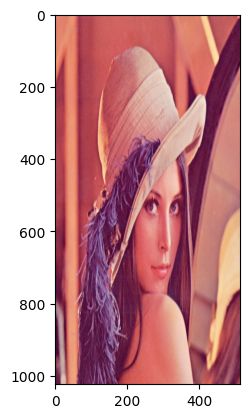

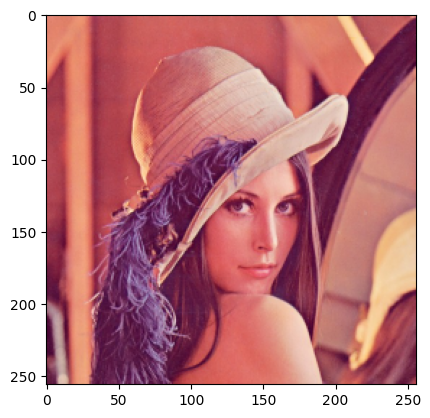

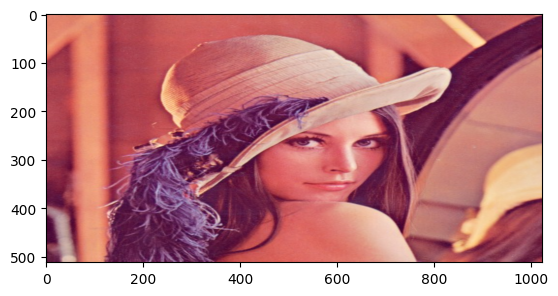

In [13]:
lena = cv2.cvtColor(cv2.imread('./img/LENA_512.jpg'), cv2.COLOR_BGR2RGB)

def scale_and_show(original, a, b):
    result = cv2.resize(original, (0,0), fx=a, fy=b, interpolation=cv2.INTER_LINEAR)
    plt.figure()
    plt.imshow(result)

scale_and_show(lena, 1, 2)
scale_and_show(lena, 0.5, 0.5)
scale_and_show(lena, 2, 1)

## Zadanie 2 (1 punkt)

Napisz funkcję wykonującą obroty obrazu "LENA_512.jpg". Argumentem takiej funkcji powinien być kąt $\phi$. 

Obrót można uzyskać za pomocą przekształcenia:


$$ 
\begin{bmatrix}
i \\ 
j  
\end{bmatrix}
= 
\begin{bmatrix} 
\cos( \phi ) & \sin(\phi) & 0 \\
- \sin(\phi) & cos(\phi) & 0  
\end{bmatrix} 
\begin{bmatrix} 
i' \\ 
j' \\ 
1 
\end{bmatrix}, 
$$

gdzie $\phi$ jest kątem obrotu. 

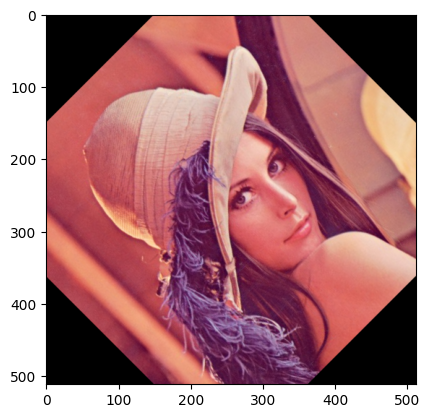

In [52]:
lena = cv2.cvtColor(cv2.imread('./img/LENA_512.jpg'), cv2.COLOR_BGR2RGB)

def rotate_and_show(original, angle):
    rot_mat = cv2.getRotationMatrix2D((original.shape[0]//2, original.shape[1]//2), angle, 1.0)
    result = cv2.warpAffine(original, rot_mat, original.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    plt.figure()
    plt.imshow(result)

rotate_and_show(lena, 45)

## Zadanie 3 (1 punkt)

Wykonaj pochylenie obrazu "LENA_512.jpg". Argumentem takiej funkcji powinien być kąt $\phi$.

Pochylenie można uzyskać za pomocą przekształcenia:

$$ 
\begin{bmatrix} 
i \\ 
j  
\end{bmatrix}= 
\begin{bmatrix} 
1 & \tan(\phi) & 0 \\ 
0 & 1 & 0  
\end{bmatrix} 
\begin{bmatrix} 
i' \\ 
j' \\ 
1 
\end{bmatrix}, 
$$

gdzie $\phi$ jest kątem pochylenia.

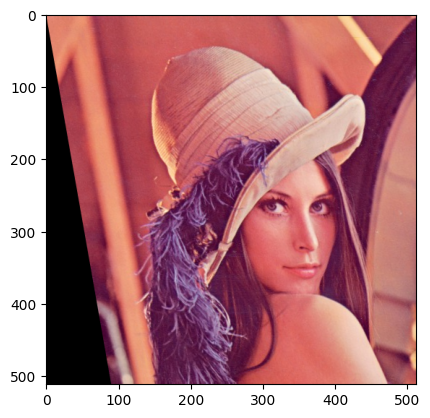

In [63]:
lena = cv2.cvtColor(cv2.imread('./img/LENA_512.jpg'), cv2.COLOR_BGR2RGB)

def tilt_and_show(original, angle):
    angle_radians = np.radians(angle)
    tilt_matrix = np.array([[1, np.tan(angle_radians), 0], [0, 1, 0]])
    result = cv2.warpAffine(original, tilt_matrix, original.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    plt.figure()
    plt.imshow(result)

tilt_and_show(lena, 10)

## Zadanie 4 (1 punkt)

Wykoaj przekształcenie panoramiczne obrazu "LENA_512.jpg".

Przekształcenie panoramiczne można uzyskać za pomocą przekształcenia:

$$
\begin{bmatrix}
i \\ 
j  
\end{bmatrix}= 
\begin{bmatrix} 
a & 0 & 0 \\ 
0 & 1 & 0  
\end{bmatrix} 
\begin{bmatrix} 
i' \\ 
j' \\ 
1 
\end{bmatrix}, 
$$

Panoramiczne przekształcenie poprawia nieprawidłowe proporcje.

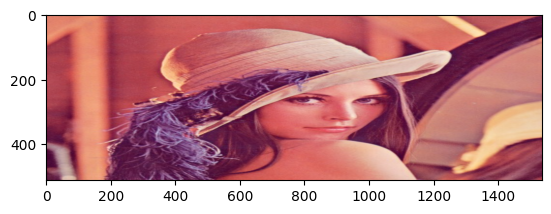

In [64]:
lena = cv2.cvtColor(cv2.imread('./img/LENA_512.jpg'), cv2.COLOR_BGR2RGB)

def panoramic_and_show(original, a):
    scale_and_show(original, a, 1)

panoramic_and_show(lena, 3)

## Zadanie 5 (2 punkty)

Znajdź macierz przekształcenia liniowego, które przekształca punkty

  * (37, 116);
  * (37, 256);
  * (454, 1);

na

  * (0, 0);
  * (0, img.rows - 1);
  * (img.cols - 1, 0);
  
a następnie proszę przemnożyć taką macierz przez obrazek:

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/content_car_registration.png)

Proszę wyświetlić przekształcony obrazek.


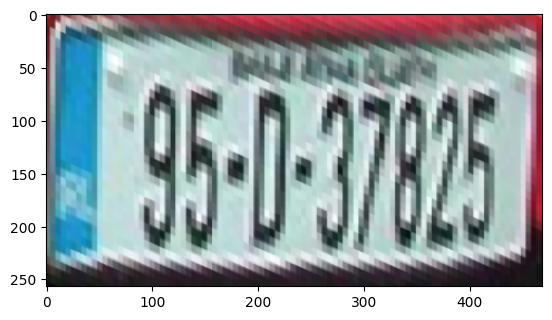

In [70]:
plates = cv2.imread('./img/content_car_registration.png')

source = np.array([[37,116], [37,256], [454, 1]], dtype="float32")
dest = np.array([[0,0], [0, plates.shape[0] - 1], [plates.shape[1] - 1, 0]], dtype="float32")

affineMatrix = cv2.getAffineTransform(source, dest)
plates_after_matrix = cv2.warpAffine(cv2.cvtColor(plates, cv2.COLOR_BGR2RGB), affineMatrix, plates.shape[1::-1], flags=cv2.INTER_LINEAR)

plt.imshow(plates_after_matrix)

## Zadanie 6 (2 punkty)

Wyznacz kontury czarnych kropeczek i narysuj je. Użyj obrazu:

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/content_circles.png))

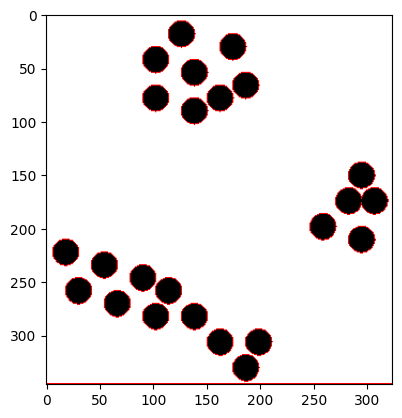

In [72]:
circles = cv2.imread('./img/content_circles.png', cv2.IMREAD_GRAYSCALE)

contours, _ = cv2.findContours(circles, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

circles_with_contours = cv2.drawContours(cv2.cvtColor(circles, cv2.COLOR_GRAY2RGB), contours, -1, (255, 0, 0), 1)

plt.imshow(circles_with_contours)

# Zadanie 7 (2 punkty)

Zaznacz rogi i kąty na obrazie:

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/corner.png)

za pomocą metod:
  * Harris Corner Detection
  * FAST Corner Detection

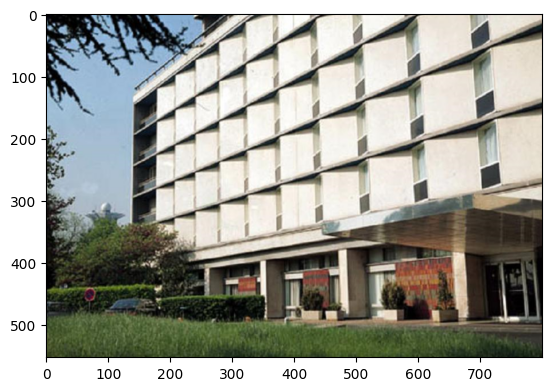

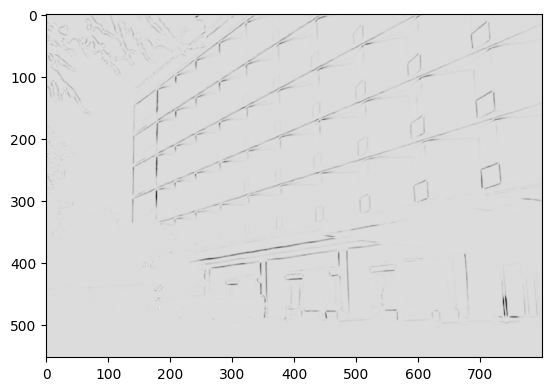

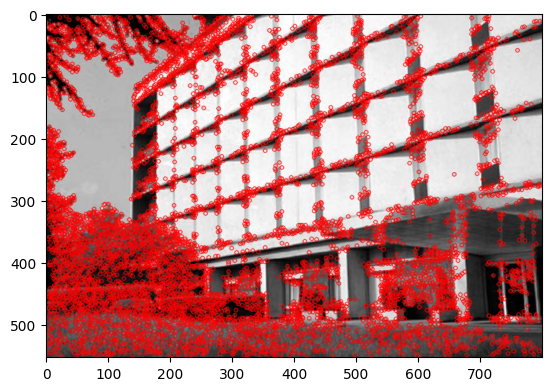

In [73]:
building = cv2.imread('./img/corner.png')
building_grayscale = cv2.cvtColor(building, cv2.COLOR_BGR2GRAY)

def corner_fast(grayscale):
    fast = cv2.FastFeatureDetector_create()
    #fast.setNonmaxSuppression(0)
    key_points = fast.detect(grayscale, None)
    return cv2.drawKeypoints(cv2.cvtColor(grayscale, cv2.COLOR_GRAY2RGB), key_points, None, color=(255, 0, 0))
    

corners_harris = cv2.cornerHarris(building_grayscale, 2, 5, 0.07)
corners_FAST = corner_fast(building_grayscale)

plt.figure()
plt.imshow(cv2.cvtColor(building, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(corners_harris, cmap='gray')
plt.figure()
plt.imshow(corners_FAST)